In [19]:
from os.path import isdir, join, normpath

# Number of tweets to receive
NUM_TWEETS = 5

# WattsDown
    

Scraping Twitter links from @meralco

- --jsonl Outputs the data in a JSON format allowing you to access tweet information. Otherwise, you’ll only receive direct links to the tweets.
- --progress Allows us to get updates from the CLI letting us know the progress of the scraping. It updates every 100 tweets. Does not appear to work when using Python with CLI.
- --max-results # Puts a cap on the number of tweets scraped.
- --since Sets lower bound date limit on query
- “until:” Sets upper bound date limit on query


In [20]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
meralco = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('ADVISORY: from:meralco -filter:replies').get_items()):
    if i > NUM_TWEETS - 1:
        break

    # Check if the tweet has an attached image
    tweet_image = None
    if len(tweet.media) > 0:
        tweet_image = tweet.media[0].fullUrl

    meralco.append([tweet.date, tweet.id, tweet.user.username, tweet.content, tweet_image])
    
# Creating a dataframe from the tweets list above
meralco_df = pd.DataFrame(meralco, columns=['Timestamp', 'Tweet ID', 'Username', 'Text', 'Image URL'])

Processing scraped information as dataframe and getting the link.

In [21]:
from IPython.display import display

display(meralco_df)


,Timestamp,Tweet ID,Username,Text,Image URL
0,2022-06-03 13:55:06+00:00,1532722545081962497,meralco,ADVISORY: May scheduled power interruptions sa...,https://pbs.twimg.com/media/FUVTB7eXwAIHD1H?fo...
1,2022-06-03 13:50:04+00:00,1532721279924686848,meralco,ADVISORY: May scheduled power interruptions sa...,https://pbs.twimg.com/media/FUVR4S1WYAA0JdH?fo...
2,2022-06-03 13:45:05+00:00,1532720026574258178,meralco,ADVISORY: May scheduled power interruptions sa...,https://pbs.twimg.com/media/FUVQvU5WUAEmXWQ?fo...
3,2022-06-03 13:40:04+00:00,1532718765749698567,meralco,ADVISORY: May scheduled power interruptions sa...,https://pbs.twimg.com/media/FUVPl74WAAIWwpQ?fo...
4,2022-06-03 13:35:05+00:00,1532717507861176321,meralco,ADVISORY: May scheduled power interruptions sa...,https://pbs.twimg.com/media/FUVOcuVXEAAZwsJ?fo...


# TRASH ZONE


Tweet ID: 1532722545081962497


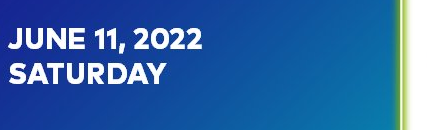

Outage date: JUNE 11, 2022 SATURDAY 


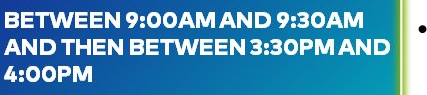

Outage time: BETWEEN 9:00AM AND 9:30AM AND THEN BETWEEN 3:30PM AND 4:00PM 


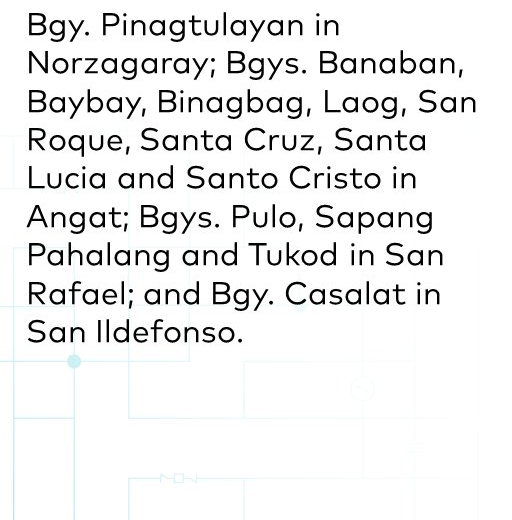

Affected areas: Bgy. Pinagtulayan in Norzagaray; Bgys. Banaban, Baybay, Binagbag, Laog, San Roque, Santa Cruz, Santa Lucia and Santo Cristo in Angat; Bgys. Pulo, Sapang Pahalang and Tukod in San Rafael; and Bgy. Casalat in San Ildefonso. 

Tweet ID: 1532721279924686848


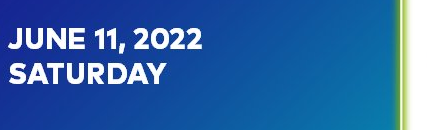

Outage date: JUNE 11, 2022 SATURDAY 


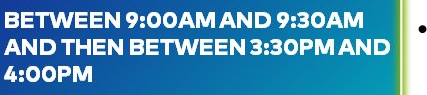

Outage time: BETWEEN 9:00AM AND 9:30AM AND THEN BETWEEN 3:30PM AND 4:00PM 


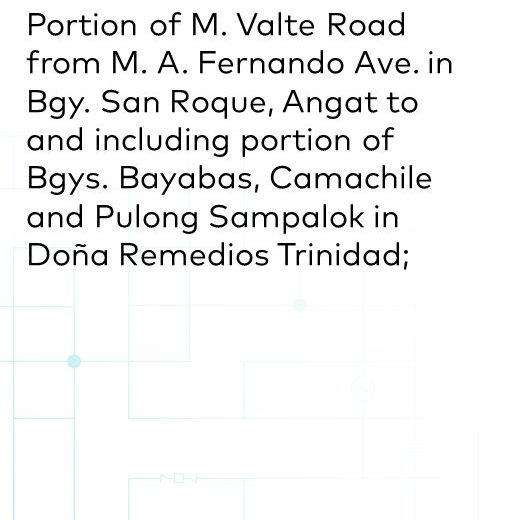

Affected areas: Portion of M. Valte Road from M. A. Fernando Ave. in Bgy. San Roque, Angat to and including portion of Bgys. Bayabas, Camachile and Pulong Sampalok in Dofia Remedios Trinidad; 

Tweet ID: 1532720026574258178


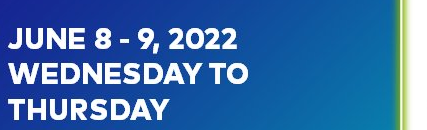

Outage date: JUNE 8 - 9, 2022 WEDNESDAY TO THURSDAY 


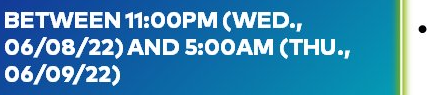

Outage time: 06/08/22) AND 5:00AM (THU.,  BETWEEN 11:00PM (WED., 06/09/22) 


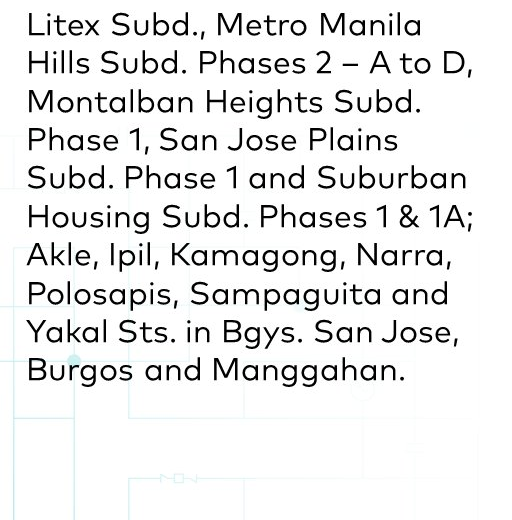

Affected areas: Litex Subd., Metro Manila Hills Subd. Phases 2- Ato D, Montalban Heights Subd. Phase 1, San Jose Plains Subd. Phase 1 and Suburban Housing Subd. Phases 1 & 1A; Akle, Ipil, Kamagong, Narra, Polosapis, Sampaguita and Yakal Sts. in Bgys. San Jose, Burgos and Manggahan. 

Tweet ID: 1532718765749698567


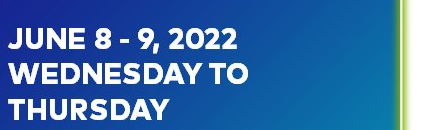

Outage date: JUNE 8 - 9, 2022 WEDNESDAY TO THURSDAY 


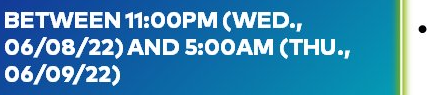

Outage time: 06/08/22) AND 5:00AM (THU.,  BETWEEN 11:00PM (WED., 06/09/22) 


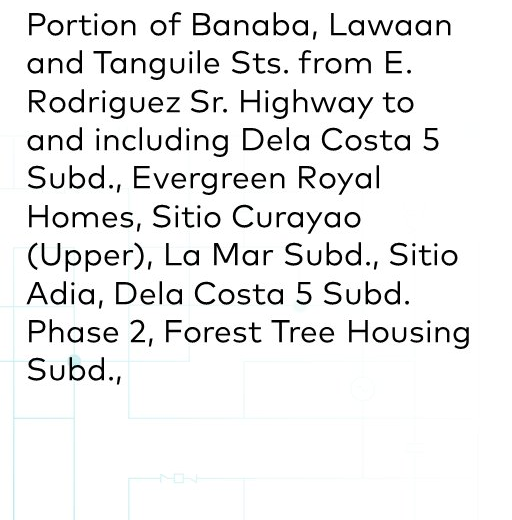

Affected areas: Portion of Banaba, Lawaan and Tanguile Sts. from E. Rodriguez Sr. Highway to and including Dela Costa 5 Subd., Evergreen Royal Homes, Sitio Curayao (Upper), La Mar Subd., Sitio Adia, Dela Costa 5 Subd. Phase 2, Forest Tree Housing Subd., 

Tweet ID: 1532717507861176321


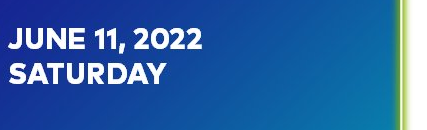

Outage date: JUNE 11, 2022 SATURDAY 


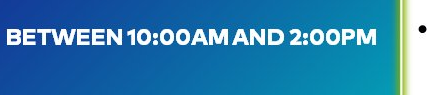

Outage time: BETWEEN 10:00AM AND 2:00PM 


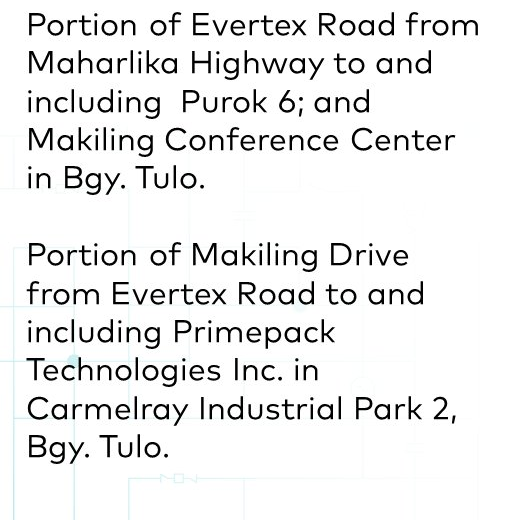

Affected areas: Portion of Evertex Road from Maharlika Highway to and including Purok 6; and Makiling Conference Center in Bgy. Tulo.  Portion of Makiling Drive from Evertex Road to and including Primepack Technologies Inc. in Carmelray Industrial Park 2, Bgy. Tulo. 


In [25]:
from os import mkdir
from PIL import Image
from requests import get
from typing import Tuple
from urllib.parse import urlsplit, parse_qsl
import pytesseract

# Create images subdirectory if it doesn't exist yet
if not isdir('images'):
    mkdir('images')

# OCR logic
def ocr_cropped(image_obj: Image, bounding_box: Tuple[int, int, int, int]) -> str:
    # Crop image to show affected areas
    cropped_image = image_obj.crop(bounding_box)
    display(cropped_image)
    
    # Convert image to text
    return pytesseract.image_to_string(cropped_image).replace('\n', ' ')

def read_meralco_bulletin(image_obj: Image):
    # Get image dimensions
    width, _ = image_obj.size

    # Define crop for image regions
    box_affected_areas = (width // 2, 390, width, 910)
    box_outage_date = (85, 220, width // 2, 350)
    box_outage_time = (85, 385, width // 2, 480)

    # Print recognized text from each area
    print(f'Outage date: {ocr_cropped(image_obj, box_outage_date)}')
    print(f'Outage time: {ocr_cropped(image_obj, box_outage_time)}')
    print(f'Affected areas: {ocr_cropped(image_obj, box_affected_areas)}')

# Iterate through every row in the dataframe
for index, row in meralco_df.iterrows():
    # Check if the tweet has an attached image
    if row['Image URL'] is not None:
        # Download the image
        response = get(row['Image URL'], stream=True)
        
        # Parse image URL to figure out the format from the query string
        image_url_qs = dict(parse_qsl(urlsplit(row['Image URL']).query))
        image_format = image_url_qs['format']

        # Create a PIL image from the response
        image = Image.open(response.raw)

        # OCR stuff
        print(f'\nTweet ID: {row["Tweet ID"]}')
        read_meralco_bulletin(image)

        # Save the image
        # image_path = normpath(join('images', f'{row["Tweet ID"]}.{image_format}'))
        # image.save(image_path)

        # Delete the response
        del response